## Assignment 3
**Section 2**  
Goe Jie Ying A23CS0224  
Lam Yoke Yu A23CS0233  
Teh Ru Qian A23CS0191  

# Rainfall Data Analysis Assignment (100 Marks, Due 6th July 2025)

You are provided with a rainfall dataset recording monthly measurements from various weather stations across different regions. The dataset includes rainfall (mm), number of rainy days, maximum and minimum temperatures, and whether the station is in an urban or rural area.

Dataset columns:

- `Region`: Name of the region (e.g., North, South, East, West)
- `Year`: Year of measurement
- `Month`: Month (e.g., Jan, Feb, ..., Dec)
- `Station`: Weather station name/ID (e.g., StationA, StationB)
- `Rainfall_mm`: Rainfall amount in millimeters
- `RainyDays`: Number of days in the month with rain
- `MaxTemp_C`: Maximum temperature recorded in that month (°C)
- `MinTemp_C`: Minimum temperature recorded in that month (°C)
- `UrbanRural`: "Urban" or "Rural"

## Part 1: Data Exploration ( 15 Marks)

1. Load the data into a pandas DataFrame. (2 Marks)
2. Display the first 5 rows of the DataFrame. (2 Marks)
3. Check for and handle any missing values. (6 Marks)
4. Provide summary statistics for all numeric columns. (5 Marks)

In [12]:
#Write your code here
import pandas as pd
import numpy as np

# 1. Load Data
# df = pd.read_csv('Rainfall.csv')
raw_df = pd.read_csv('Rainfall.csv', header=None)
df = raw_df[0].str.split(',', expand=True)
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

# 2. Display first 5 rows
df.head()


,Region,Year,Month,Station,Rainfall_mm,RainyDays,MaxTemp_C,MinTemp_C,UrbanRural
0,North,2023,Jan,StationA,56.2,9,12.1,2.5,Urban
1,North,2023,Feb,StationA,72.1,12,14.7,3.0,Urban
2,North,2023,Jan,StationB,60.5,10,11.2,1.8,Rural
3,South,2023,Jan,StationC,81.0,13,19.6,7.2,Urban
4,South,2023,Feb,StationC,63.4,11,20.1,7.7,Urban


In [13]:
# 3. Check for missing values
print(df.isnull().sum())
df = df.dropna()

0
Region         0
Year           0
Month          0
Station        0
Rainfall_mm    0
RainyDays      0
MaxTemp_C      0
MinTemp_C      0
UrbanRural     0
dtype: int64


Since the sum of null values is zero for all columns, there is no missing values.

In [14]:
# 4. Summary Statistics
cols_to_convert = ['Year', 'Rainfall_mm', 'RainyDays', 'MaxTemp_C', 'MinTemp_C']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col])
    
df.describe()

,Year,Rainfall_mm,RainyDays,MaxTemp_C,MinTemp_C
count,10.0,10.000000,10.00000,10.000000,10.000000
mean,2023.0,66.160000,10.90000,16.100000,4.740000
std,0.0,12.154121,1.66333,2.982542,2.029888
min,2023.0,45.700000,8.00000,11.200000,1.800000
25%,2023.0,59.825000,10.00000,14.775000,3.050000
50%,2023.0,62.450000,11.00000,16.100000,5.100000
75%,2023.0,76.075000,12.00000,18.125000,6.050000
max,2023.0,84.200000,13.00000,20.100000,7.700000


## Part 2: Grouping and Aggregation (30 Marks)

1. For each **Station**, compute: (6 Marks)
    - Total rainfall 
    - Average number of rainy days 
    - Average maximum temperature 
    - Average minimum temperature



In [33]:
#Write your code here
df.groupby('Station').agg(
    Total_rainfall = ('Rainfall_mm', 'sum'),
    Average_number_of_rainy_days = ('RainyDays', 'mean'),
    Average_maximum_temperature = ('MaxTemp_C', 'mean'),
    Average_minimum_temperature = ('MinTemp_C', 'mean'))

,Total_rainfall,Average_number_of_rainy_days,Average_maximum_temperature,Average_minimum_temperature
Station,,,,
StationA,128.3,10.5,13.40,2.75
StationB,122.0,10.5,13.10,2.50
StationC,144.4,12.0,19.85,7.45
StationD,105.3,9.0,16.65,5.90
StationE,161.6,12.5,17.50,5.10


2. For each **Region & UrbanRural** combination, calculate: (6 Marks)
    - Average rainfall
    - Average maximum temperature
    - Average number of rainy days


In [ ]:
#Write your code here
df.groupby(['Region', 'UrbanRural'])[['Rainfall_mm', 'MaxTemp_C', 'RainyDays']].mean()

0                  Rainfall_mm  MaxTemp_C  RainyDays
Region UrbanRural                                   
East   Rural             52.65      16.65        9.0
North  Rural             61.00      13.10       10.5
       Urban             64.15      13.40       10.5
South  Urban             72.20      19.85       12.0
West   Urban             80.80      17.50       12.5

3. For each **Month** and **Region**, calculate: (6 Marks)
    - Total rainfall
    - Mean rainfall
    - Minimum and maximum rainfall


In [18]:
#Write your code here
df.groupby(['Month', 'Region'])['Rainfall_mm'].agg(['sum', 'mean', 'max', 'min'])

sum   mean   max   min
Month Region                          
Feb   East     59.6  59.60  59.6  59.6
      North    72.1  72.10  72.1  72.1
      South    63.4  63.40  63.4  63.4
      West     84.2  84.20  84.2  84.2
Jan   East     45.7  45.70  45.7  45.7
      North   116.7  58.35  60.5  56.2
      South    81.0  81.00  81.0  81.0
      West     77.4  77.40  77.4  77.4
Mar   North    61.5  61.50  61.5  61.5

4. Find the **Region and Month** with the highest recorded rainfall in the dataset. (4 Marks)


In [36]:
#Write your code here
index = df['Rainfall_mm'].idxmax()
print("Region: ", df.loc[index]['Region'])
print("Month: ", df.loc[index]['Month'])
print("Rainfall_mm: ", df.loc[index]['Rainfall_mm'])

Region:  West
Month:  Feb
Rainfall_mm:  84.2


5. For each **Year** and **UrbanRural** group, calculate: (4 Marks)
    - Average rainfall
    - Minimum rainfall
    - Maximum rainfall



In [20]:
#Write your code here
df.groupby(['Year', 'UrbanRural'])['Rainfall_mm'].agg(['mean', 'max', 'min'])

mean   max   min
Year UrbanRural                       
2023 Rural       56.825000  61.5  45.7
     Urban       72.383333  84.2  56.2

6. For each **Region**, calculate the average temperature range per month (i.e., average of MaxTemp_C - MinTemp_C). (4 Marks)

In [21]:
#Write your code here
df['TempRange_C'] = df['MaxTemp_C'] - df['MinTemp_C']

df.groupby('Region')['TempRange_C'].mean()

Region
East     10.750
North    10.625
South    12.400
West     12.400
Name: TempRange_C, dtype: float64

## Part 3: Data Visualization (matplotlib) (40 Marks)

1. **Bar Chart:**  (8 Marks)
   - Plot total rainfall by region, colored by Urban/Rural.
   - Add value labels, gridlines, axis labels, title, and adjust bar width for clarity.



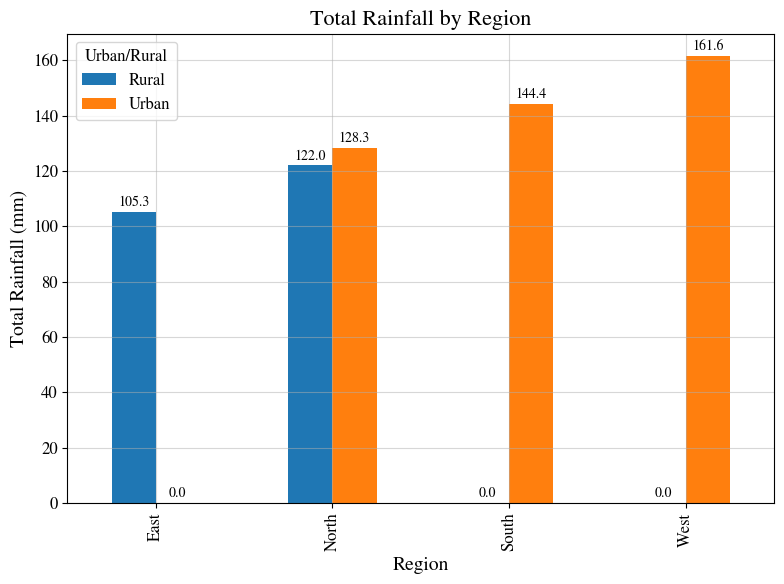

In [38]:
#Write your code here
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams.update({'font.size': 12, 'font.family': 'STIXGeneral',
                            'mathtext.fontset': 'stix'})

total_rainfall = df.groupby(['Region', 'UrbanRural'])['Rainfall_mm'].sum().reset_index()
total_rainfall_pivot = total_rainfall.pivot(index='Region', columns='UrbanRural', values='Rainfall_mm')

ax = total_rainfall_pivot.plot.bar(figsize=(8, 6))

plt.title('Total Rainfall by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Rainfall (mm)', fontsize=14)
plt.legend(title='Urban/Rural', loc=0, fontsize=12)
plt.grid(True, alpha=0.5)

# Value Labels
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height()
    ax.text(x, y + 1, f'{y:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('total_rainfall_by_region.png', dpi=300)
plt.show()

2. **Grouped Bar Chart:**  (6 Marks)
   - Show average monthly rainfall for each station.
   - Use different colors for each station, include a legend, rotate x-tick labels, and increase figure size for readability.



C:\Users\yuyla\AppData\Local\Temp\ipykernel_24716\3448992222.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rainfall = df.groupby(['Station', 'Month'])['Rainfall_mm'].mean().reset_index()


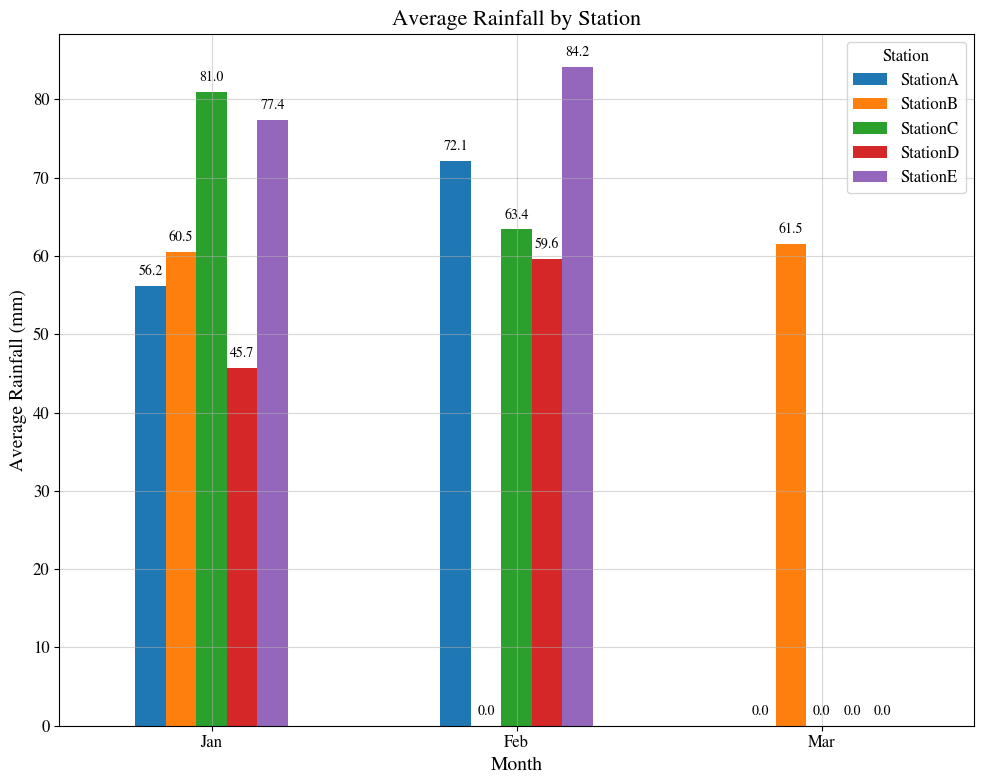

In [39]:
#Write your code here
df['Month'] = pd.Categorical(df['Month'],
    categories=['Jan','Feb','Mar'],
    ordered=True)

average_rainfall = df.groupby(['Station', 'Month'])['Rainfall_mm'].mean().reset_index()
average_rainfall_pivot = average_rainfall.pivot(index='Month', columns='Station', values='Rainfall_mm')

ax = average_rainfall_pivot.plot.bar(figsize=(10, 8))

plt.title('Average Rainfall by Station', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Rainfall (mm)', fontsize=14)
plt.xticks(rotation=360)
plt.grid(True, alpha=0.5)
plt.legend(title="Station", loc=1)

# Value Labels
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height()
    ax.text(x, y + 1, f'{y:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('average_rainfall_by_station.png', dpi=300)
plt.show()

3. **Line Plot:**  (6 Marks)
   - Show the trend of rainfall over months for at least two selected stations.
   - Use markers, dashed lines, highlight the month with maximum rainfall, and format the x-axis for months.

In [24]:
# rainfall_pivot = df.pivot(index='Station', columns='Month', values='Rainfall_mm')
# rainfall_pivot

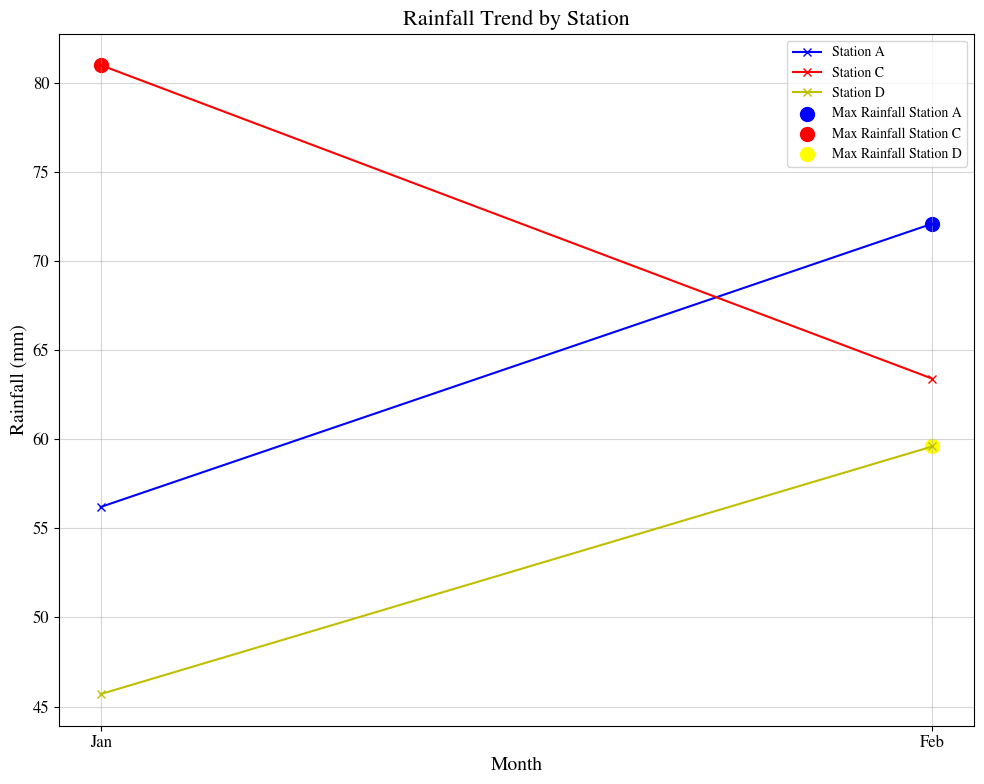

In [25]:
#Write your code here
station_a = df[df['Station'] == 'StationA']
station_c = df[df['Station'] == 'StationC']
station_d = df[df['Station'] == 'StationD']

plt.figure(figsize=(10, 8))
plt.plot(station_a['Month'], station_a['Rainfall_mm'], label='Station A', marker='x', linestyle='-', color='b')
plt.plot(station_c['Month'], station_c['Rainfall_mm'], label='Station C', marker='x', linestyle='-', color='r')
plt.plot(station_d['Month'], station_d['Rainfall_mm'], label='Station D', marker='x', linestyle='-', color='y')

# Max rainfall
max_station_a = station_a[station_a['Rainfall_mm'] == station_a['Rainfall_mm'].max()]
max_station_c = station_c[station_c['Rainfall_mm'] == station_c['Rainfall_mm'].max()]
max_station_d = station_d[station_d['Rainfall_mm'] == station_d['Rainfall_mm'].max()]

plt.scatter(max_station_a['Month'], max_station_a['Rainfall_mm'], s=100, color='blue', label='Max Rainfall Station A')
plt.scatter(max_station_c['Month'], max_station_c['Rainfall_mm'], s=100, color='red', label='Max Rainfall Station C')
plt.scatter(max_station_d['Month'], max_station_d['Rainfall_mm'], s=100, color='yellow', label='Max Rainfall Station D')

plt.title('Rainfall Trend by Station', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Rainfall (mm)', fontsize=14)
plt.xticks(rotation=360)
plt.grid(True, alpha=0.5)
plt.legend(loc=1, fontsize=10)

plt.tight_layout()
plt.savefig('rainfall_trend_by_station.png', dpi=300)
plt.show()

4. **Boxplot:**  (6 Marks)
   - Display rainfall distributions by region and by Urban/Rural.
   - Use custom box colors, highlight outliers, and set y-axis limits.

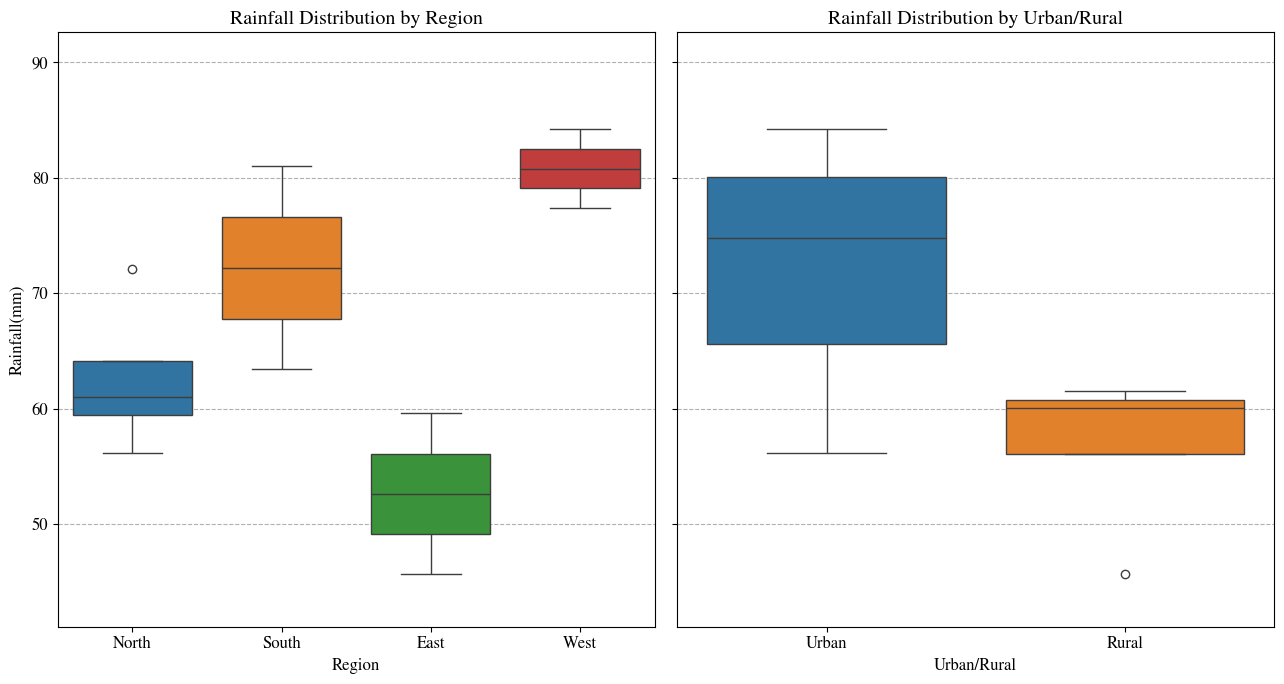

In [43]:
#Write your code here
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(13,7), sharey=True)

#By Region
sns.boxplot(x='Region', y='Rainfall_mm', hue='Region', data=df, ax=ax[0])
ax[0].set_title('Rainfall Distribution by Region')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Rainfall(mm)')
ax[0].set_ylim(df['Rainfall_mm'].min()*0.9, df['Rainfall_mm'].max()*1.1)
ax[0].grid(axis='y', linestyle='--')

sns.boxplot(x='UrbanRural', y='Rainfall_mm', hue='UrbanRural', data=df, ax=ax[1])
ax[1].set_title('Rainfall Distribution by Urban/Rural')
ax[1].set_xlabel('Urban/Rural')
ax[1].set_ylabel('Rainfall(mm)')
ax[1].set_ylim(df['Rainfall_mm'].min()*0.9, df['Rainfall_mm'].max()*1.1)
ax[1].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.savefig('rainfall_distribution_boxplot.png')
plt.show()

5. **Scatter Plot:**  (6 Marks)
   - Visualize the relationship between rainfall and maximum temperature, colored by region.
   - Add axis labels, legend, gridlines, and an appropriate title.



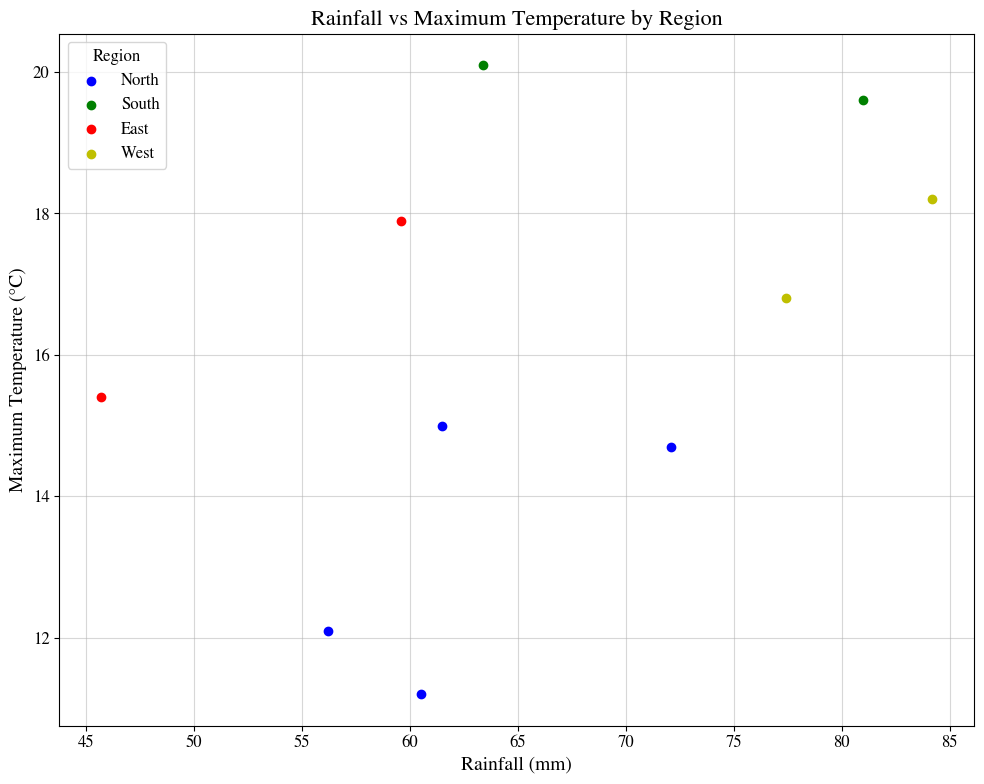

In [49]:
#Write your code here
plt.figure(figsize=(10, 8))

region_colors = {
    'North': 'b',
    'South': 'g',
    'East': 'r',
    'West': 'y'
}

for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    plt.scatter(region_data['Rainfall_mm'], region_data['MaxTemp_C'], 
                label=region, 
                color=region_colors[region])

plt.title('Rainfall vs Maximum Temperature by Region', fontsize=16)
plt.xlabel('Rainfall (mm)', fontsize=14)
plt.ylabel('Maximum Temperature (°C)', fontsize=14)
plt.grid(True, alpha=0.5)
plt.legend(title='Region', fontsize=12, loc="upper left")

plt.tight_layout()
plt.savefig('rainfall_vs_max_temp_by_region.png', dpi=300)
plt.show()

6. **Heatmap:**  
   - Create a heatmap showing mean monthly rainfall for each region (Month on x-axis, Region on y-axis).
   - Add color bar, axis labels, and title.



C:\Users\yuyla\AppData\Local\Temp\ipykernel_24716\2233405815.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rainfall = df.groupby(['Region', 'Month'])['Rainfall_mm'].mean().unstack()


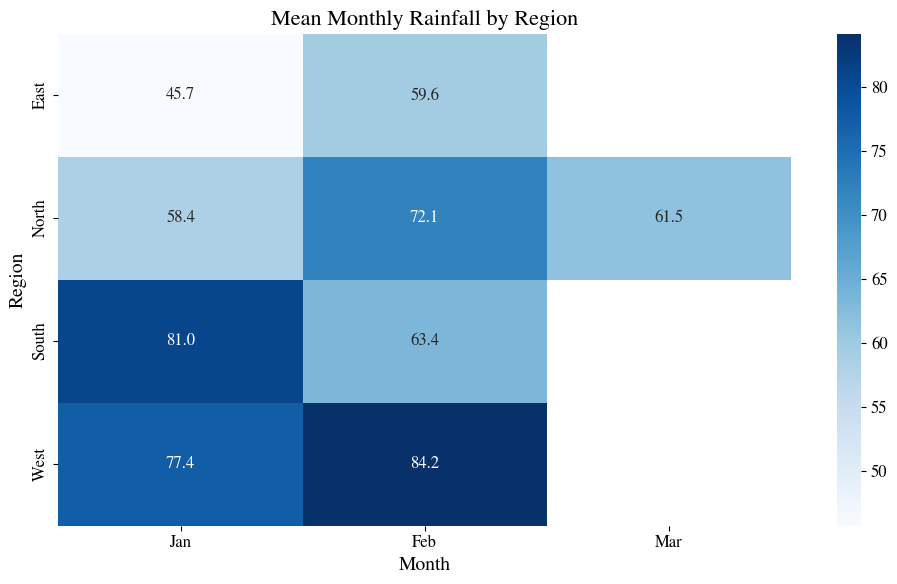

In [52]:
#Write your code here
mean_rainfall = df.groupby(['Region', 'Month'])['Rainfall_mm'].mean().unstack()
mean_rainfall

plt.figure(figsize=(10, 6))
sns.heatmap(mean_rainfall, cmap='Blues', annot=True, fmt=".1f", cbar=True)

plt.title('Mean Monthly Rainfall by Region', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Region', fontsize=14)

plt.tight_layout()
plt.savefig('mean_monthly_rainfall_by_region.png', dpi=300)
plt.show()

7. **Formatting (for all plots):** (8 Marks)
   - Use descriptive titles, axis labels, and legends.
   - Increase font size for readability.
   - Save each figure as an image file (`.png`).
   - Use `plt.tight_layout()` for proper spacing.

In [29]:
#Write your code here
# Done in sections above

## Part 4: Bonus Tasks (15 Marks)

1. Annotate at least one plot with the value and label of the highest/lowest point. (5 Marks)


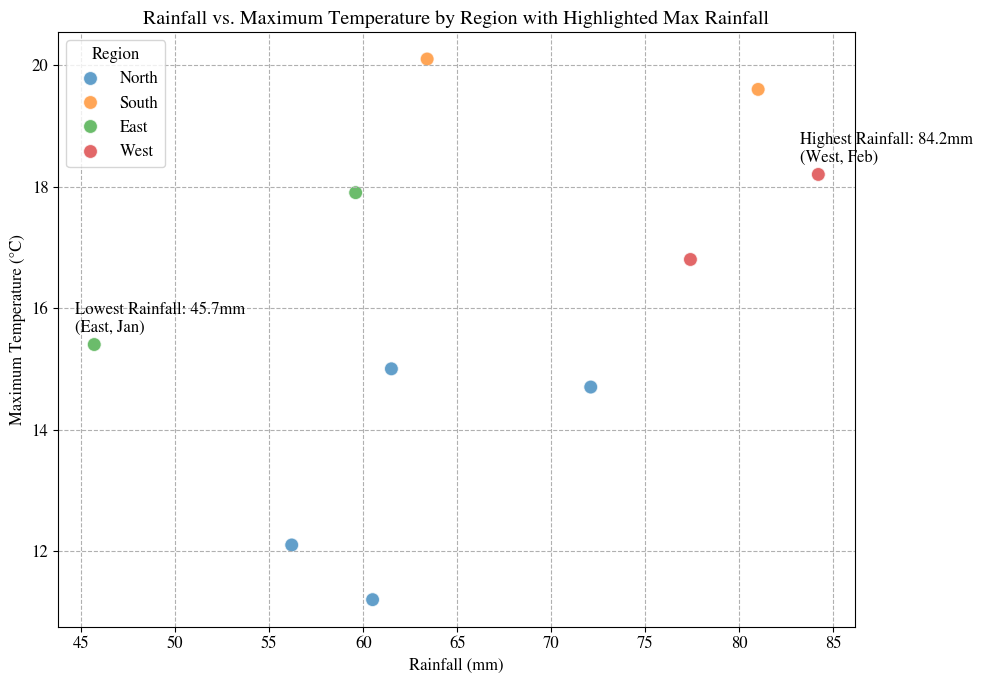

In [60]:
#Write your code here
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x='Rainfall_mm', y='MaxTemp_C', hue='Region', data=df, ax=ax, s=100, alpha=0.7)
ax.set_title('Rainfall vs. Maximum Temperature by Region with Highlighted Max Rainfall')
ax.set_xlabel('Rainfall (mm)')
ax.set_ylabel('Maximum Temperature (°C)')
ax.grid(True, linestyle='--')
ax.legend(title='Region')

highest_rainfall_row = df.loc[df['Rainfall_mm'].idxmax()]
ax.annotate(
    f"Highest Rainfall: {highest_rainfall_row['Rainfall_mm']:.1f}mm\n({highest_rainfall_row['Region']}, {highest_rainfall_row['Month']})",
    xy=(highest_rainfall_row['Rainfall_mm'], highest_rainfall_row['MaxTemp_C']),
    xytext=(highest_rainfall_row['Rainfall_mm'] - 1, highest_rainfall_row['MaxTemp_C'] + 0.2)
)

lowest_rainfall_row = df.loc[df['Rainfall_mm'].idxmin()]
ax.annotate(
    f"Lowest Rainfall: {lowest_rainfall_row['Rainfall_mm']:.1f}mm\n({lowest_rainfall_row['Region']}, {lowest_rainfall_row['Month']})",
    xy=(lowest_rainfall_row['Rainfall_mm'], lowest_rainfall_row['MaxTemp_C']),
    xytext=(lowest_rainfall_row['Rainfall_mm'] - 1, lowest_rainfall_row['MaxTemp_C'] + 0.2)
)

plt.tight_layout()
plt.show()

2. Create a **facet/grid plot** comparing rainfall trends by region and Urban/Rural status. (5 Marks)


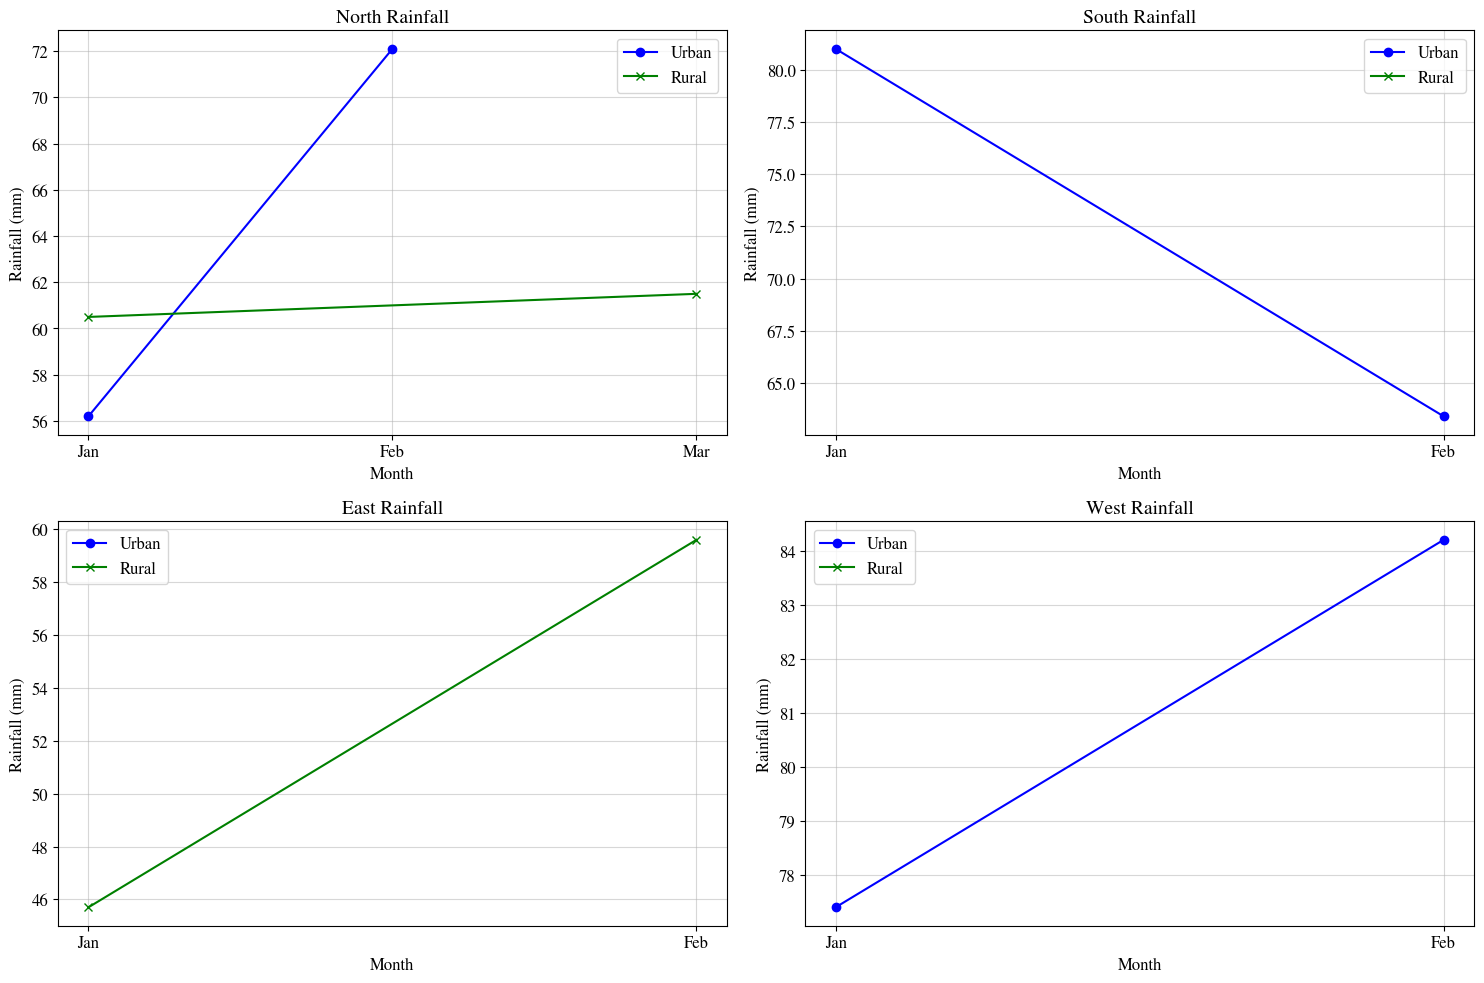

In [31]:
import matplotlib.pyplot as plt


regions = df['Region'].unique()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, region in enumerate(regions):
    region_data = df[df['Region'] == region]
    
    urban_data = region_data[region_data['UrbanRural'] == 'Urban']
    axes[idx].plot(urban_data['Month'], urban_data['Rainfall_mm'], marker='o', color='b', label='Urban')

    rural_data = region_data[region_data['UrbanRural'] == 'Rural']
    axes[idx].plot(rural_data['Month'], rural_data['Rainfall_mm'], marker='x', color='g', label='Rural')

    axes[idx].set_title(f'{region} Rainfall', fontsize=14)
    axes[idx].set_xlabel('Month', fontsize=12)
    axes[idx].set_ylabel('Rainfall (mm)', fontsize=12)
    axes[idx].grid(True, alpha=0.5)
    axes[idx].legend()

plt.tight_layout()
plt.show()


3. Write a brief summary (in a Markdown cell) of your main insights from the data and visualizations. (5 Marks)


From the bar chart, boxplot, and heatmap, the **West** region has the **highest average rainfall** (161.6 mm), while the **East** region has the **lowest average rainfall** (105.3 mm).

There seems to be a **correlation** between rainfall and temperature. When we examine the **average temperature range per month**, we see the pattern: **East < North < South <= West**. Interestingly, this pattern mirrors the total rainfall by region: **East < North < South < West**.

**February** had the highest average rainfall across most stations.

Besides, StationE (West) and StationC (South) recorded consistenly high rainfall. On top of that, rainfall variation was **greater** in **South and West** regions, with some outliers.